<a href="https://colab.research.google.com/github/NeerajaSuresh888/Market-Segmentation-Analysis/blob/main/EV_Market_Segmentation__Age_Based_Analysis_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv("/content/ev_market analysis.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
Shape: (99, 8)
Columns: ['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Personal loan', 'Total Salary', 'Price']

First 5 rows:
   Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate                 3   
4   31   Salaried         Married  Post Graduate                 2   

  Personal loan  Total Salary    Price  
0           Yes        800000   800000  
1           Yes       2000000  1000000  
2           Yes       1800000  1200000  
3            No       2200000  1200000  
4           Yes       2600000  1600000  


In [4]:
# Data preprocessing and exploration
print("\nAge Distribution Summary:")
print(df['Age'].describe())

# Check for missing values
print(f"\nMissing values in Age column: {df['Age'].isnull().sum()}")


Age Distribution Summary:
count    99.000000
mean     36.313131
std       6.246054
min      26.000000
25%      31.000000
50%      36.000000
75%      41.000000
max      51.000000
Name: Age, dtype: float64

Missing values in Age column: 0


In [5]:
# Create age groups for better analysis
def categorize_age(age):
    if age <= 25:
        return "Gen Z (18-25)"
    elif age <= 35:
        return "Millennials (26-35)"
    elif age <= 45:
        return "Gen X (36-45)"
    else:
        return "Boomers (46+)"

df['Age_Group'] = df['Age'].apply(categorize_age)

# Display age group distribution
print("\nAge Group Distribution:")
print(df['Age_Group'].value_counts())


Age Group Distribution:
Age_Group
Millennials (26-35)    48
Gen X (36-45)          43
Boomers (46+)           8
Name: count, dtype: int64


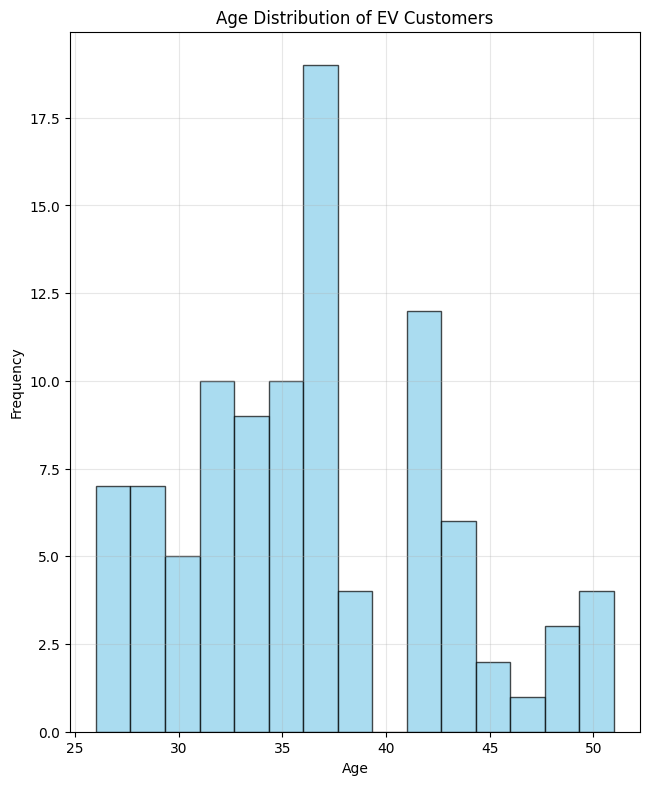

In [9]:
# 1. Age Distribution Visualization
plt.figure(figsize=(25, 20))

# Subplot 1: Age Distribution Histogram
plt.subplot(2, 3, 1)
plt.hist(df['Age'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of EV Customers')
plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Customer Distribution by Age Groups')

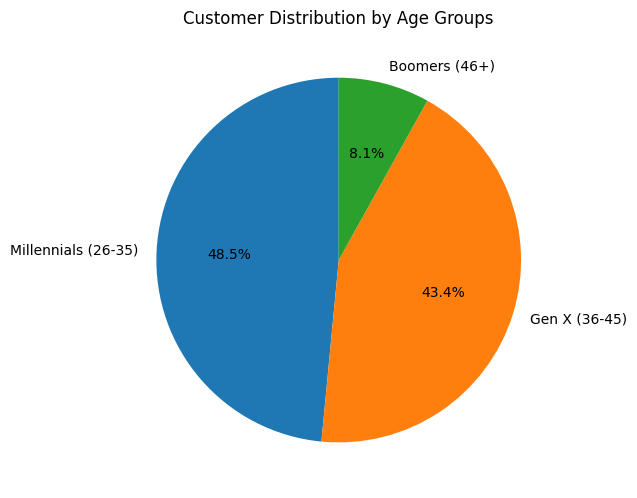

In [11]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 2)
age_group_counts = df['Age_Group'].value_counts()
plt.pie(age_group_counts.values, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Distribution by Age Groups')



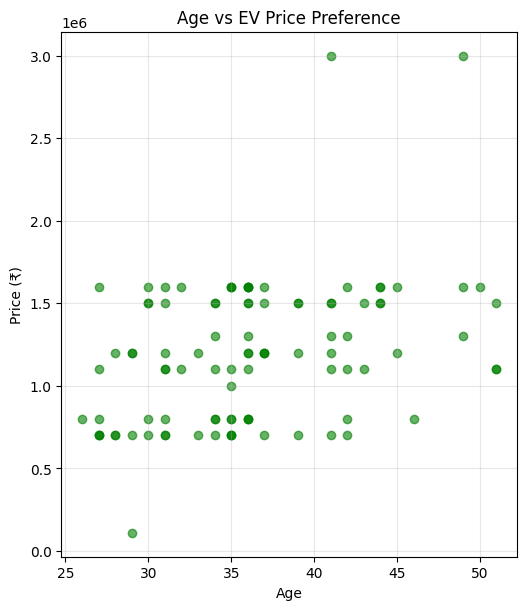

In [13]:
# Subplot 3: Age vs Price Scatter Plot
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 3)
plt.scatter(df['Age'], df['Price'], alpha=0.6, color='green')
plt.xlabel('Age')
plt.ylabel('Price (₹)')
plt.title('Age vs EV Price Preference')
plt.grid(True, alpha=0.3)

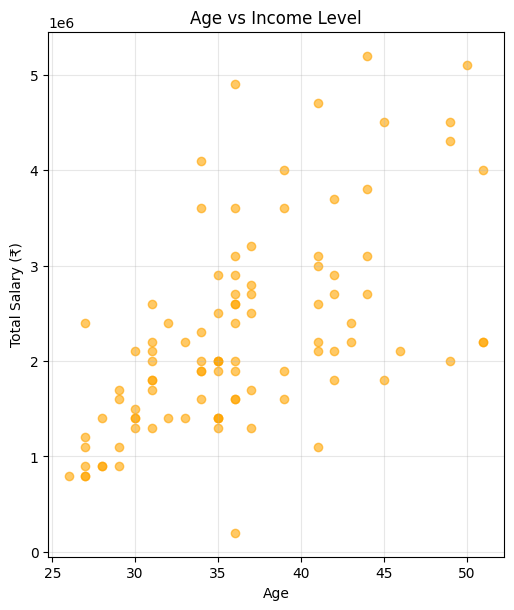

In [14]:
# Subplot 4: Age vs Total Salary
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 4)
plt.scatter(df['Age'], df['Total Salary'], alpha=0.6, color='orange')
plt.xlabel('Age')
plt.ylabel('Total Salary (₹)')
plt.title('Age vs Income Level')
plt.grid(True, alpha=0.3)

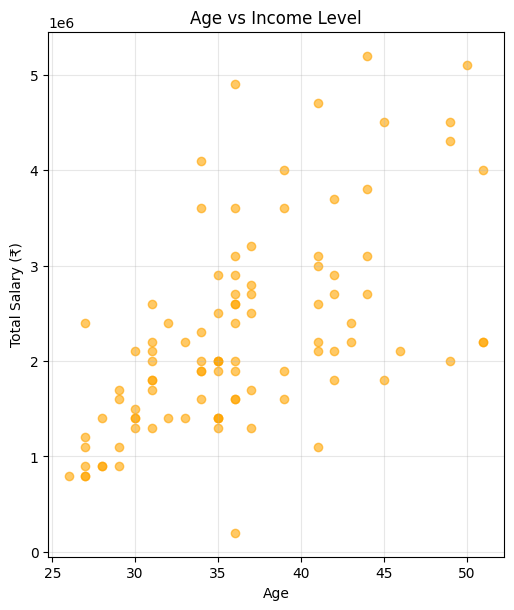

In [15]:
# Subplot 4: Age vs Total Salary
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 4)
plt.scatter(df['Age'], df['Total Salary'], alpha=0.6, color='orange')
plt.xlabel('Age')
plt.ylabel('Total Salary (₹)')
plt.title('Age vs Income Level')
plt.grid(True, alpha=0.3)

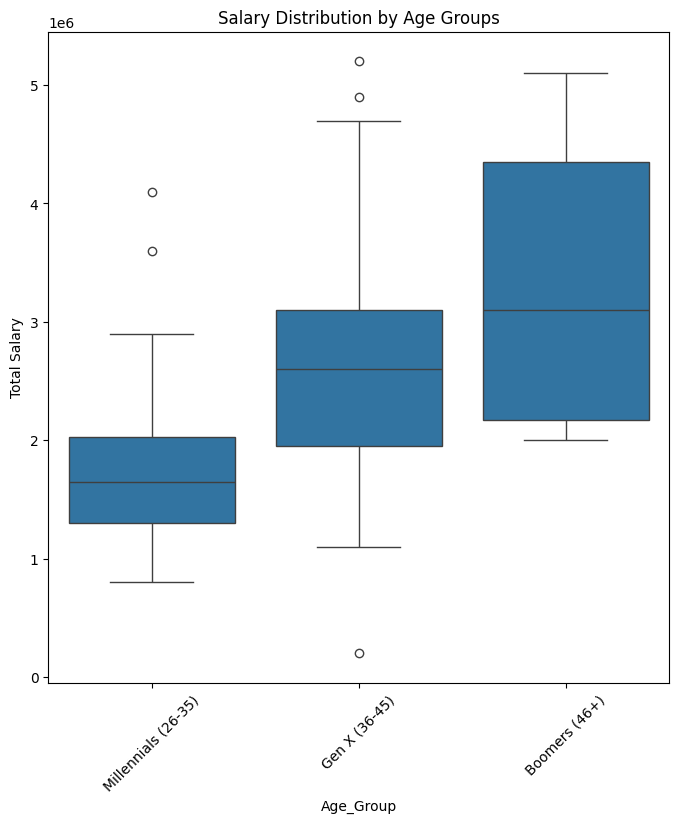

In [16]:
# Subplot 6: Box plot - Age Group vs Salary
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 6)
sns.boxplot(x='Age_Group', y='Total Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Age Groups')

plt.tight_layout()
plt.show()


In [17]:
# ===== K-MEANS CLUSTERING BASED ON AGE =====

# Prepare features for clustering (Age, Total Salary, Price)
features = ['Age', 'Total Salary', 'Price']
X = df[features].copy()

# Handle any potential outliers
print(f"\nFeature Statistics:")
print(X.describe())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Feature Statistics:
             Age  Total Salary         Price
count  99.000000  9.900000e+01  9.900000e+01
mean   36.313131  2.270707e+06  1.194040e+06
std     6.246054  1.050777e+06  4.376955e+05
min    26.000000  2.000000e+05  1.100000e+05
25%    31.000000  1.550000e+06  8.000000e+05
50%    36.000000  2.100000e+06  1.200000e+06
75%    41.000000  2.700000e+06  1.500000e+06
max    51.000000  5.200000e+06  3.000000e+06


In [18]:
# Elbow Method for optimal number of clusters
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

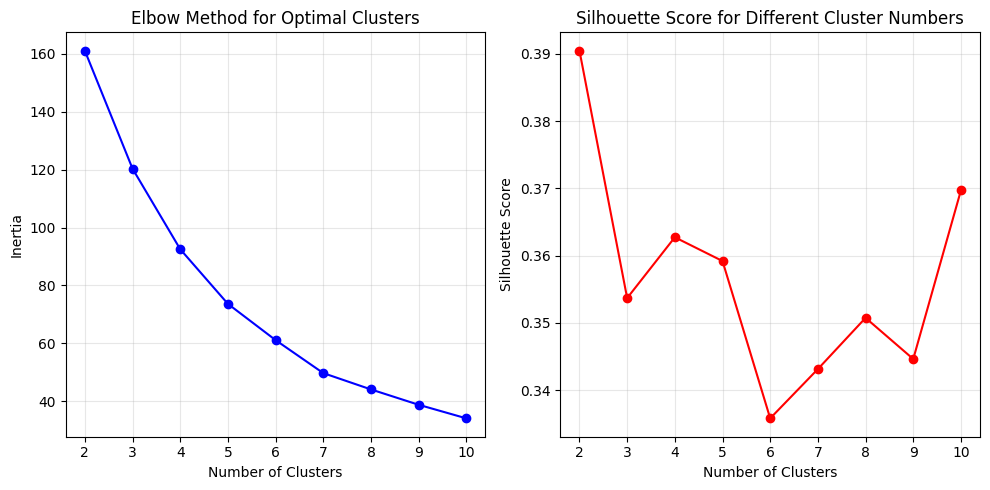

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# Choose optimal number of clusters (let's use 4 based on age groups)
optimal_k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Age_Cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nOptimal number of clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, df['Age_Cluster']):.3f}")

# Display cluster assignments
print("\nCluster Distribution:")
print(df['Age_Cluster'].value_counts().sort_index())


Optimal number of clusters: 4
Silhouette Score: 0.363

Cluster Distribution:
Age_Cluster
0    42
1    11
2    29
3    17
Name: count, dtype: int64


In [21]:
# ===== CLUSTER ANALYSIS =====

# Analyze clusters
cluster_analysis = df.groupby('Age_Cluster').agg({
    'Age': ['mean', 'min', 'max', 'std'],
    'Total Salary': ['mean', 'min', 'max', 'std'],
    'Price': ['mean', 'min', 'max', 'std'],
    'No of Dependents': 'mean'
}).round(0)

print("\nCluster Analysis Summary:")
print(cluster_analysis)



Cluster Analysis Summary:
              Age              Total Salary                              \
             mean min max  std         mean      min      max       std   
Age_Cluster                                                               
0            32.0  26  41  4.0    1435714.0   200000  2200000  436629.0   
1            45.0  36  51  5.0    4427273.0  3700000  5200000  515928.0   
2            35.0  27  41  3.0    2648276.0  1400000  4100000  621416.0   
3            44.0  39  51  4.0    2294118.0  1800000  3100000  381560.0   

                 Price                             No of Dependents  
                  mean      min      max       std             mean  
Age_Cluster                                                          
0             845476.0   110000  1200000  222472.0              2.0  
1            1827273.0  1500000  3000000  581534.0              3.0  
2            1472414.0  1200000  1600000  148556.0              2.0  
3            1170588.0   70

In [22]:
# Visualize clusters
plt.figure(figsize=(20, 12))


<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

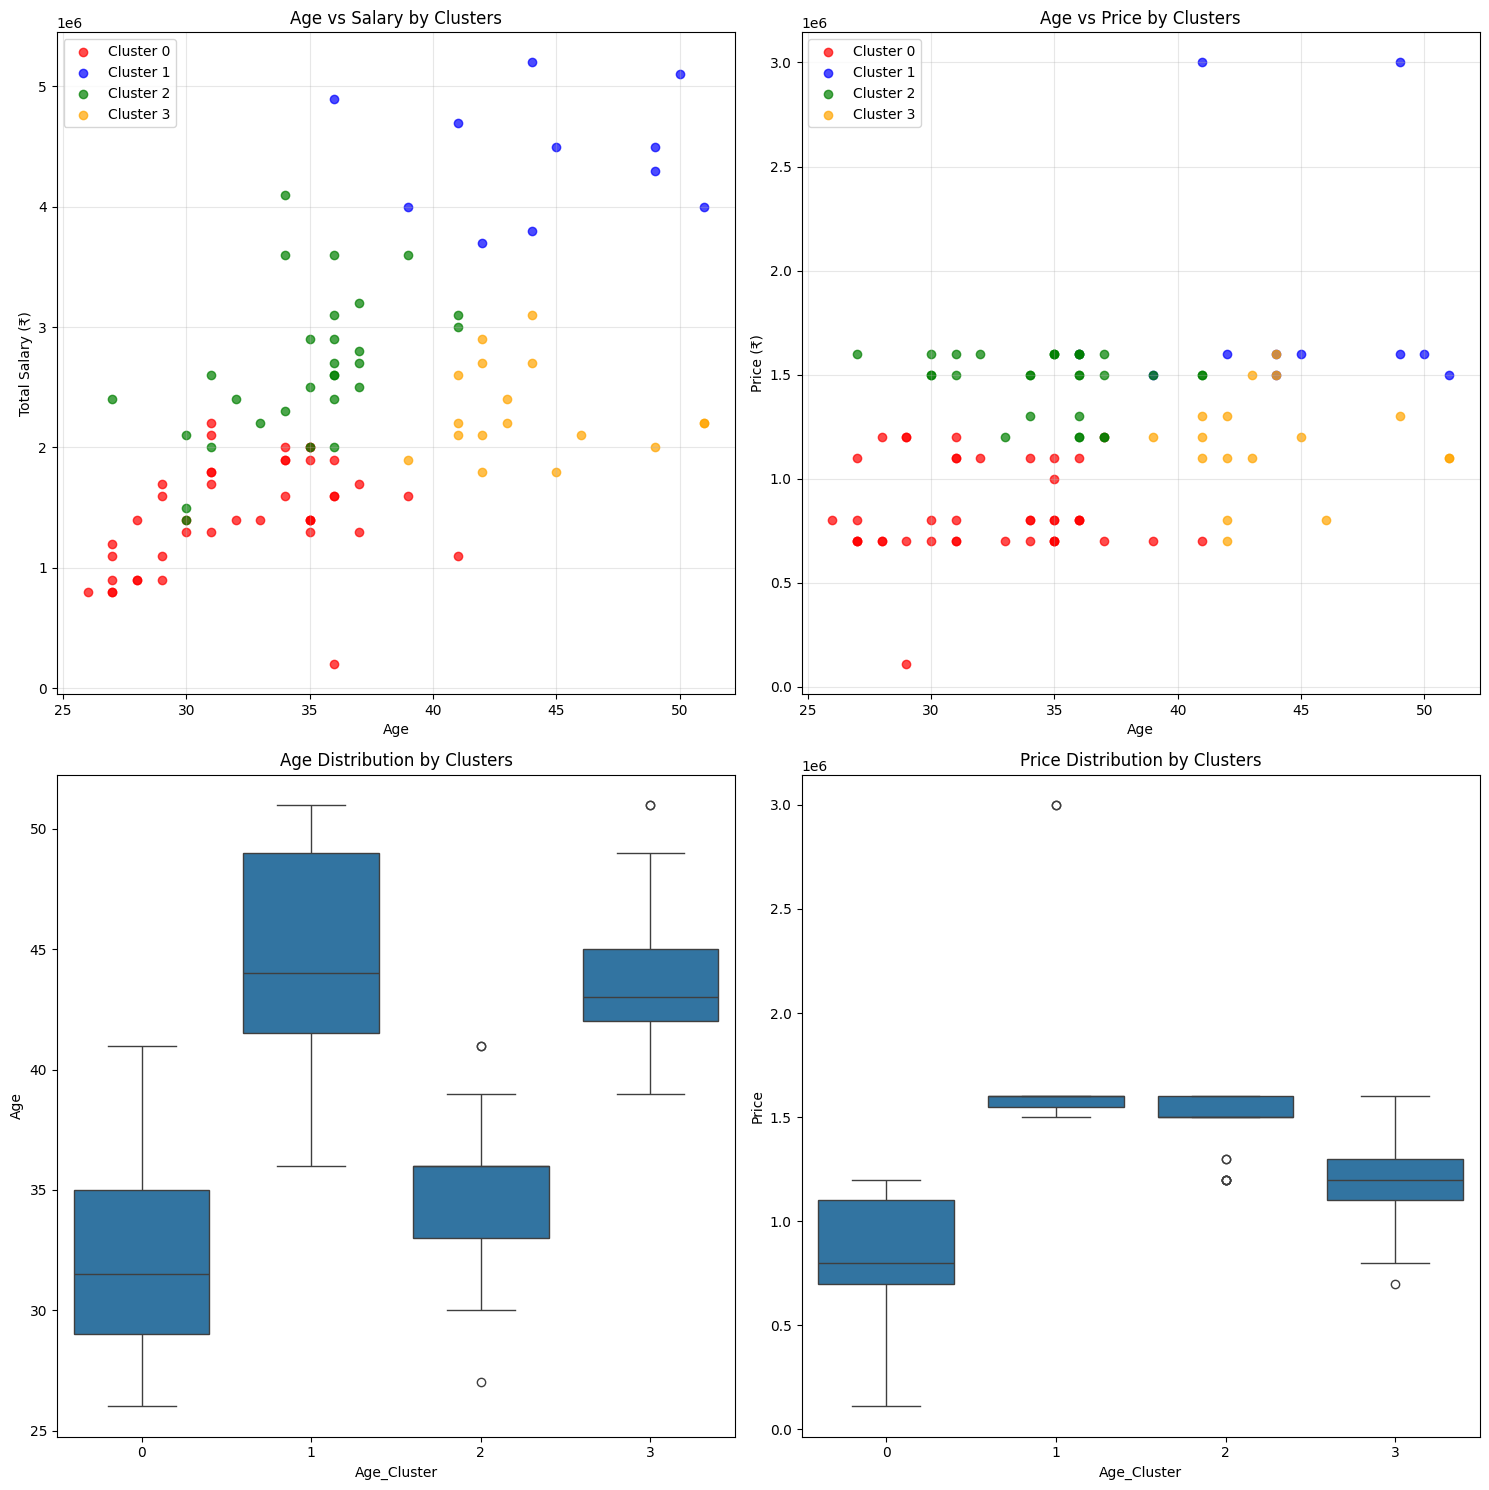

In [25]:
# 3D scatter plot (Age, Salary, Price with clusters)
plt.figure(figsize=(15, 15))
from mpl_toolkits.mplot3d import Axes3D

plt.subplot(2, 2, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(optimal_k):
    cluster_data = df[df['Age_Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Total Salary'],
               c=colors[i], label=f'Cluster {i}', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Total Salary (₹)')
plt.title('Age vs Salary by Clusters')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
for i in range(optimal_k):
    cluster_data = df[df['Age_Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Price'],
               c=colors[i], label=f'Cluster {i}', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Price (₹)')
plt.title('Age vs Price by Clusters')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
sns.boxplot(x='Age_Cluster', y='Age', data=df)
plt.title('Age Distribution by Clusters')

plt.subplot(2, 2, 4)
sns.boxplot(x='Age_Cluster', y='Price', data=df)
plt.title('Price Distribution by Clusters')

plt.tight_layout()
plt.show()

In [37]:
# ===== DETAILED SEGMENT PROFILING =====

print("\n" + "="*60)
print("DETAILED AGE-BASED SEGMENT PROFILING")
print("="*60)

for cluster in range(optimal_k):
    cluster_data = df[df['Age_Cluster'] == cluster]
    print(f"\n **CLUSTER {cluster} PROFILE:")
    print(f"   Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"   Age Range: {cluster_data['Age'].min()}-{cluster_data['Age'].max()} years")
    print(f"   Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"   Average Income: ₹{cluster_data['Total Salary'].mean():,.0f}")
    print(f"   Average Price Preference: ₹{cluster_data['Price'].mean():,.0f}")
    print(f"   Average Dependents: {cluster_data['No of Dependents'].mean():.1f}")

    # Most common characteristics
    print(f"   Most Common Profession: {cluster_data['Profession'].mode().iloc[0]}")
    print(f"   Most Common Education: {cluster_data['Education'].mode().iloc[0]}")
    print(f"   Most Common Marital Status: {cluster_data['Marrital Status'].mode().iloc[0]}")

    # Calculate affordability ratio
    affordability_ratio = (cluster_data['Price'] / cluster_data['Total Salary']).mean()
    print(f"   Price-to-Income Ratio: {affordability_ratio:.2f}")


DETAILED AGE-BASED SEGMENT PROFILING

 **CLUSTER 0 PROFILE:
   Size: 42 customers (42.4%)
   Age Range: 26-41 years
   Average Age: 32.2 years
   Average Income: ₹1,435,714
   Average Price Preference: ₹845,476
   Average Dependents: 2.0
   Most Common Profession: Salaried
   Most Common Education: Post Graduate
   Most Common Marital Status: Married
   Price-to-Income Ratio: 0.73

 **CLUSTER 1 PROFILE:
   Size: 11 customers (11.1%)
   Age Range: 36-51 years
   Average Age: 44.5 years
   Average Income: ₹4,427,273
   Average Price Preference: ₹1,827,273
   Average Dependents: 2.6
   Most Common Profession: Salaried
   Most Common Education: Post Graduate
   Most Common Marital Status: Married
   Price-to-Income Ratio: 0.41

 **CLUSTER 2 PROFILE:
   Size: 29 customers (29.3%)
   Age Range: 27-41 years
   Average Age: 34.8 years
   Average Income: ₹2,648,276
   Average Price Preference: ₹1,472,414
   Average Dependents: 1.9
   Most Common Profession: Salaried
   Most Common Education: P

In [27]:
# ===== STRATEGIC RECOMMENDATIONS =====

print("\n" + "="*60)
print("STRATEGIC RECOMMENDATIONS FOR EV STARTUP")
print("="*60)

# Age group analysis for targeting
age_group_analysis = df.groupby('Age_Group').agg({
    'Age': 'mean',
    'Total Salary': 'mean',
    'Price': 'mean',
    'No of Dependents': 'mean'
}).round(0)

print("\nAge Group Analysis:")
print(age_group_analysis)


STRATEGIC RECOMMENDATIONS FOR EV STARTUP

Age Group Analysis:
                      Age  Total Salary      Price  No of Dependents
Age_Group                                                           
Boomers (46+)        50.0     3300000.0  1500000.0               3.0
Gen X (36-45)        39.0     2676744.0  1309302.0               3.0
Millennials (26-35)  31.0     1735417.0  1039792.0               2.0


In [28]:
# Innovation adoption lifecycle mapping
print("\n INNOVATION ADOPTION LIFECYCLE MAPPING:")
print("\n1. INNOVATORS (2.5%): Ages 26-30 with high income")
innovators = df[(df['Age'] >= 26) & (df['Age'] <= 30) & (df['Total Salary'] > df['Total Salary'].quantile(0.75))]
print(f"   Potential Innovators: {len(innovators)} customers")
print(f"   Average Price Preference: ₹{innovators['Price'].mean():,.0f}")

print("\n2. EARLY ADOPTERS (13.5%): Ages 31-40 with good income")
early_adopters = df[(df['Age'] >= 31) & (df['Age'] <= 40) & (df['Total Salary'] > df['Total Salary'].median())]
print(f"   Potential Early Adopters: {len(early_adopters)} customers")
print(f"   Average Price Preference: ₹{early_adopters['Price'].mean():,.0f}")

print("\n3. EARLY MAJORITY (34%): Ages 35-45 mainstream market")
early_majority = df[(df['Age'] >= 35) & (df['Age'] <= 45)]
print(f"   Potential Early Majority: {len(early_majority)} customers")
print(f"   Average Price Preference: ₹{early_majority['Price'].mean():,.0f}")

# Final strategic recommendations
print("\n FINAL STRATEGIC RECOMMENDATIONS:")
print("\n1. PRIMARY TARGET SEGMENT:")
primary_segment = df[(df['Age'] >= 30) & (df['Age'] <= 40) & (df['Total Salary'] >= 1500000)]
print(f"   Ages 30-40 with income ≥15L: {len(primary_segment)} customers")
print(f"   Average price preference: ₹{primary_segment['Price'].mean():,.0f}")



📊 INNOVATION ADOPTION LIFECYCLE MAPPING:

1. INNOVATORS (2.5%): Ages 26-30 with high income
   Potential Innovators: 0 customers
   Average Price Preference: ₹nan

2. EARLY ADOPTERS (13.5%): Ages 31-40 with good income
   Potential Early Adopters: 23 customers
   Average Price Preference: ₹1,452,174

3. EARLY MAJORITY (34%): Ages 35-45 mainstream market
   Potential Early Majority: 53 customers
   Average Price Preference: ₹1,262,264

🎯 FINAL STRATEGIC RECOMMENDATIONS:

1. PRIMARY TARGET SEGMENT:
   Ages 30-40 with income ≥15L: 45 customers
   Average price preference: ₹1,251,111


In [35]:
# Final strategic recommendations
print("\n FINAL STRATEGIC RECOMMENDATIONS:")
print("\n1. PRIMARY TARGET SEGMENT:")
primary_segment = df[(df['Age'] >= 30) & (df['Age'] <= 40) & (df['Total Salary'] >= 1500000)]
print(f"   Ages 30-40 with income ≥15L: {len(primary_segment)} customers")
print(f"   Average price preference: ₹{primary_segment['Price'].mean():,.0f}")

print("\n2. RECOMMENDED PRICING STRATEGY:")
for cluster in range(optimal_k):
    cluster_data = df[df['Age_Cluster'] == cluster]
    avg_age = cluster_data['Age'].mean()
    avg_price = cluster_data['Price'].mean()
    if avg_age < 30:
        segment_name = "Young Professionals"
    elif avg_age < 40:
        segment_name = "Mid-Career Professionals"
    elif avg_age < 50:
        segment_name = "Senior Professionals"
    else:
        segment_name = "Experienced Professionals"

    print(f"   {segment_name}: ₹{avg_price:,.0f} - ₹{avg_price*1.2:,.0f}")

print("\n3. MARKET ENTRY STRATEGY:")
print("   Phase 1: Target Cluster with highest income-to-age ratio")
print("   Phase 2: Expand to adjacent age segments")
print("   Phase 3: Mass market penetration")



 FINAL STRATEGIC RECOMMENDATIONS:

1. PRIMARY TARGET SEGMENT:
   Ages 30-40 with income ≥15L: 45 customers
   Average price preference: ₹1,251,111

2. RECOMMENDED PRICING STRATEGY:
   Mid-Career Professionals: ₹845,476 - ₹1,014,571
   Senior Professionals: ₹1,827,273 - ₹2,192,727
   Mid-Career Professionals: ₹1,472,414 - ₹1,766,897
   Senior Professionals: ₹1,170,588 - ₹1,404,706

3. MARKET ENTRY STRATEGY:
   Phase 1: Target Cluster with highest income-to-age ratio
   Phase 2: Expand to adjacent age segments
   Phase 3: Mass market penetration


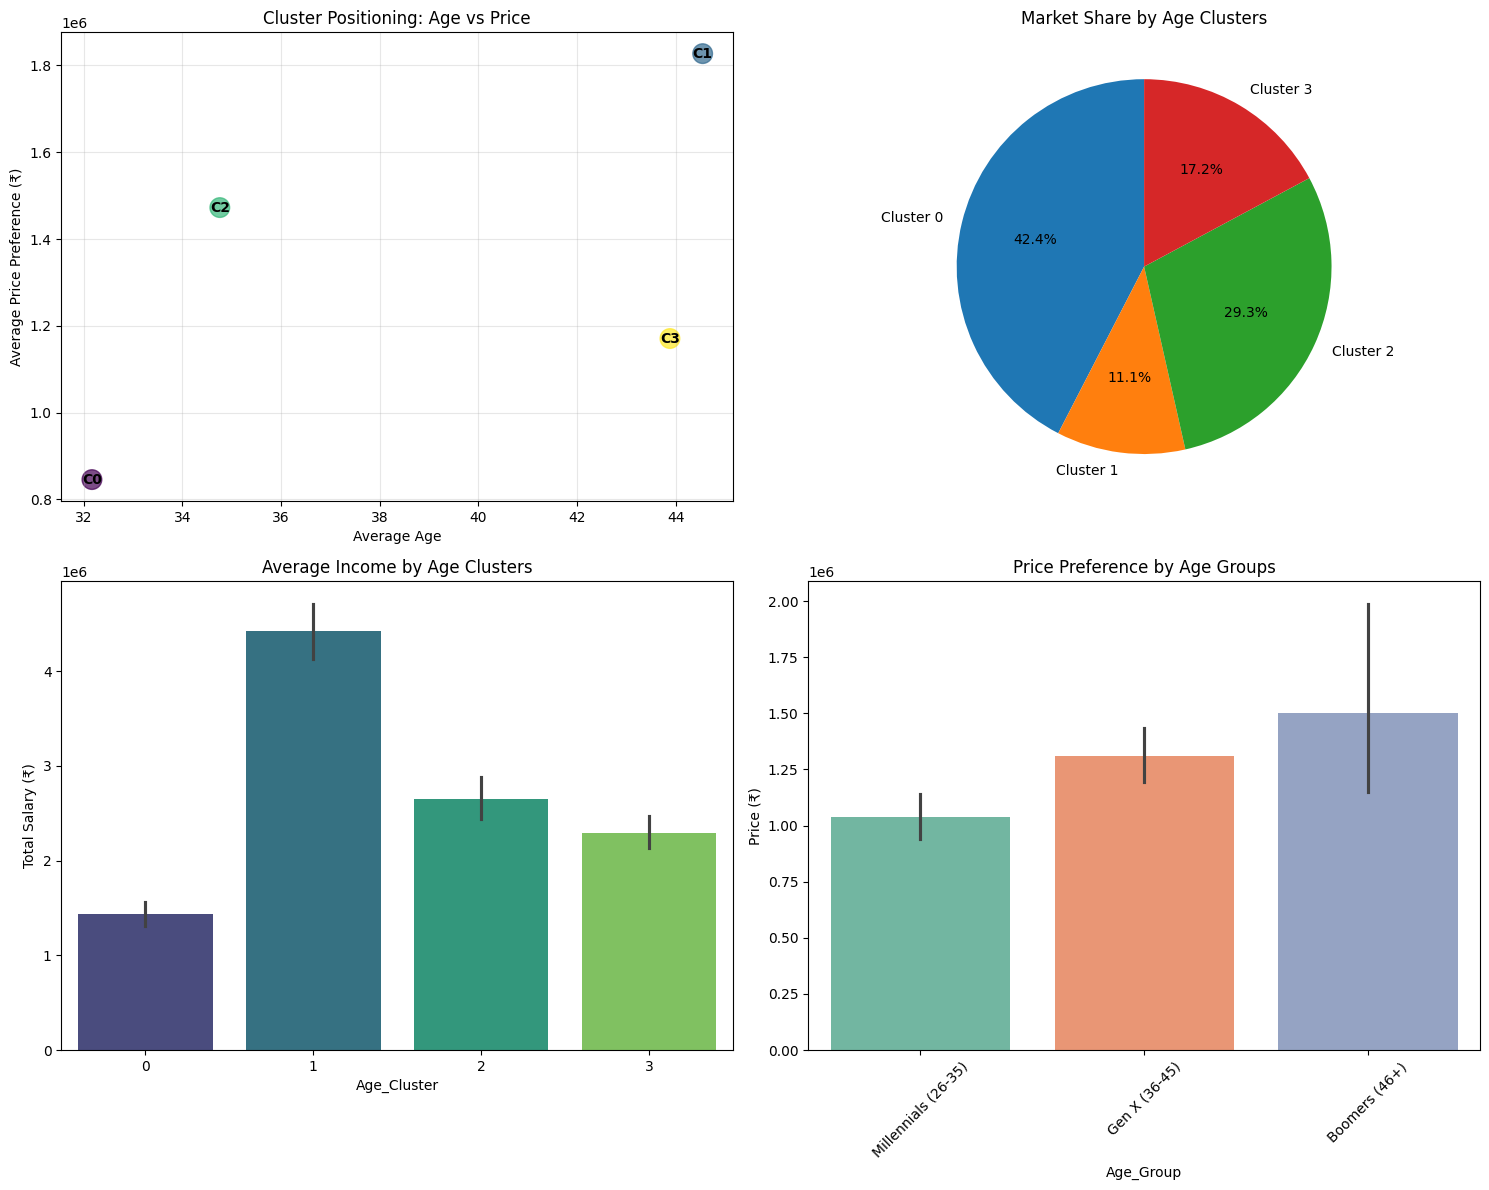


✅ Age-based market segmentation analysis completed!
📊 Use these insights to develop targeted marketing strategies for each age segment.


In [31]:
# Create a summary visualization
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
age_price_by_cluster = df.groupby('Age_Cluster').agg({'Age': 'mean', 'Price': 'mean'})
plt.scatter(age_price_by_cluster['Age'], age_price_by_cluster['Price'],
           c=range(optimal_k), cmap='viridis', s=200, alpha=0.7)
for i, (age, price) in enumerate(zip(age_price_by_cluster['Age'], age_price_by_cluster['Price'])):
    plt.annotate(f'C{i}', (age, price), ha='center', va='center', fontweight='bold')
plt.xlabel('Average Age')
plt.ylabel('Average Price Preference (₹)')
plt.title('Cluster Positioning: Age vs Price')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
cluster_sizes = df['Age_Cluster'].value_counts().sort_index()
plt.pie(cluster_sizes.values, labels=[f'Cluster {i}' for i in cluster_sizes.index],
        autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Age Clusters')

plt.subplot(2, 2, 3)
sns.barplot(x='Age_Cluster', y='Total Salary', data=df, palette='viridis')
plt.title('Average Income by Age Clusters')
plt.ylabel('Total Salary (₹)')

plt.subplot(2, 2, 4)
sns.barplot(x='Age_Group', y='Price', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Price Preference by Age Groups')
plt.ylabel('Price (₹)')

plt.tight_layout()
plt.show()

print("\nAge-based market segmentation analysis completed!")
print(" Use these insights to develop targeted marketing strategies for each age segment.")